<a href="https://colab.research.google.com/github/bridyash13/Data_Analytics_Lab_Batch_A/blob/main/DA_Exp4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [206]:
# from google.colab import drive
# drive.mount('/content/drive')

In [207]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression  
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

lm = LinearRegression()

In [208]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/climate_change.csv")
df.rename(columns={'CFC-12':'CFC_12', 'CFC-11': 'CFC_11'}, inplace=True)
df

,Year,Month,MEI,CO2,CH4,N2O,CFC_11,CFC_12,TSI,Aerosols,Temp
0,1983,5,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,1983,6,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1983,7,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1983,8,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,1983,9,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149
...,...,...,...,...,...,...,...,...,...,...,...
303,2008,8,-0.266,384.15,1779.88,321.405,244.200,535.072,1365.6570,0.0036,0.407
304,2008,9,-0.643,383.09,1795.08,321.529,244.083,535.048,1365.6647,0.0043,0.378
305,2008,10,-0.780,382.99,1814.18,321.796,244.080,534.927,1365.6759,0.0046,0.440
306,2008,11,-0.621,384.13,1812.37,322.013,244.225,534.906,1365.7065,0.0048,0.394


In [209]:
df.isnull().sum()

Year        0
Month       0
MEI         0
CO2         0
CH4         0
N2O         0
CFC_11      0
CFC_12      0
TSI         0
Aerosols    0
Temp        0
dtype: int64

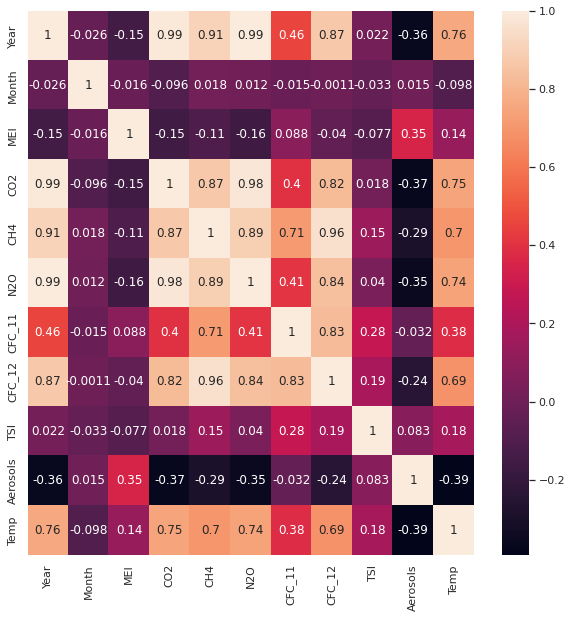

In [210]:
sns.set(rc={"figure.figsize": (10,10)}) 
sns.heatmap(df.corr(), annot=True)

In [211]:
df_train = df[df["Year"]<=2006]
df_train = df_train.drop(["Year","Month"],axis=1)
df_train

,MEI,CO2,CH4,N2O,CFC_11,CFC_12,TSI,Aerosols,Temp
0,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149
...,...,...,...,...,...,...,...,...,...
279,0.759,380.45,1762.66,319.930,248.981,539.682,1365.7067,0.0041,0.482
280,0.793,378.92,1776.04,320.010,248.775,539.566,1365.8419,0.0043,0.425
281,0.892,379.16,1789.02,320.125,248.666,539.488,1365.8270,0.0044,0.472
282,1.292,380.18,1791.91,320.321,248.605,539.500,1365.7039,0.0049,0.440


In [212]:
df_test = df[df["Year"]>2006]
df_test = df_test.drop(["Year","Month"],axis=1)
df_test.head()

,MEI,CO2,CH4,N2O,CFC_11,CFC_12,TSI,Aerosols,Temp
284,0.974,382.93,1799.66,320.561,248.372,539.206,1365.7173,0.0054,0.601
285,0.510,383.81,1803.08,320.571,248.264,538.973,1365.7145,0.0051,0.498
286,0.074,384.56,1803.10,320.548,247.997,538.811,1365.7544,0.0045,0.435
287,-0.049,386.40,1802.11,320.518,247.574,538.586,1365.7228,0.0045,0.466
288,0.183,386.58,1795.65,320.445,247.224,538.130,1365.6932,0.0041,0.372


In [213]:
df1 = df.drop('Month', axis=1)
df1 = df1.sort_values('Year')
df1.drop(['Year'],axis=1,inplace=True)
df1 = df1[(np.abs(stats.zscore(df1)) < 3).all(axis=1)]
df1 = df1.drop(columns=['N2O'], axis=1)
display(df1)

,MEI,CO2,CH4,CFC_11,CFC_12,TSI,Aerosols,Temp
1,2.167,345.52,1633.71,192.057,351.848,1366.1208,0.0794,0.118
2,1.741,344.15,1633.22,192.818,353.725,1366.2850,0.0731,0.137
3,1.130,342.25,1631.35,193.602,355.633,1366.4202,0.0673,0.176
4,0.428,340.17,1648.40,194.392,357.465,1366.2335,0.0619,0.149
5,0.002,340.30,1663.79,195.171,359.174,1366.0589,0.0569,0.093
...,...,...,...,...,...,...,...,...
297,-1.402,385.73,1803.45,245.898,536.484,1365.7366,0.0036,0.198
296,-1.011,385.44,1809.92,246.183,536.876,1365.7163,0.0038,0.074
306,-0.621,384.13,1812.37,244.225,534.906,1365.7065,0.0048,0.394
300,-0.355,388.50,1796.43,244.914,535.399,1365.7175,0.0031,0.283


In [214]:
from sklearn.linear_model import LinearRegression  
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [215]:
variables = ['CFC_12', 'Aerosols', 'CFC_11', 'MEI', 'TSI']

In [216]:
X_train, X_test, y_train, y_test = train_test_split(df1[variables], df1['Temp'], test_size=0.2, random_state=42)
LinearRegression_model=LinearRegression(fit_intercept=True,normalize=True,copy_X=True, n_jobs=10)

In [217]:
LR = LinearRegression_model.fit(X_train[variables],y_train)

print("Co-efficient: ", LR.coef_)
print("Intercept: ",LR.intercept_)

Co-efficient:  [ 0.00355657 -2.26505733 -0.00600911  0.06157488  0.07658244]
Intercept:  -104.600041015014


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


In [218]:
y_pred_LR=LinearRegression_model.predict(X_test[variables])
print(" The Score Linear Regression " ,r2_score(y_test,y_pred_LR))

 The Score Linear Regression  0.7455475436593422


Conclusion:<br>
From the analysis of the results obtained from tests performed , I came to know that the variables 'CFC_12', 'Aerosols', 'CFC_11', 'MEI', 'TSI' are significant in the model i.e. their p-value is below 0.05. <br>
All of the gas concentration variables reflect human development - N2O and CFC.11 are correlated with other variables in the data set. To verify this, I tried removing/adding some of the variables and observed different values of coefficient indicating its dependence on values of coefficient of other variables.<br>